In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np  # shift + enter

In [2]:
img_array=cv2.imread("data/train/angry/im3.png")

In [3]:
img_array.shape  # rgb 3 channels

(48, 48, 3)

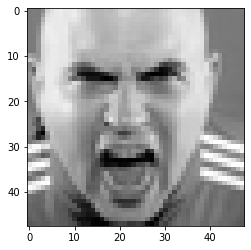

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="New_data/Training"  # training data set

In [6]:
Classes=["0","1","2","3","4","5","6"]  # list of classes

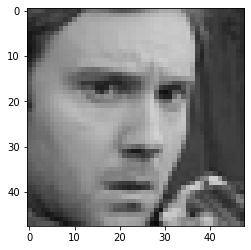

In [7]:
for category in Classes:
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

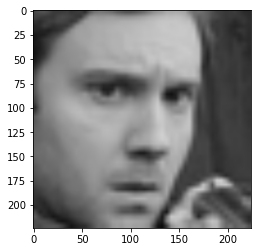

In [8]:
img_size=224
new_array=cv2.resize(img_array ,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show

In [9]:
new_array.shape

(224, 224, 3)

#Read all the images and convert it into the array

In [10]:
training_Data=[]  # data array

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num=Classes.index(category)  # 0,1 label
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array ,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

28709


In [13]:
temp=np.array(training_Data)

<ipython-input-13-4a7cfb5125a8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp=np.array(training_Data)


In [14]:
temp.shape

(28709, 2)

In [15]:
import random
random.shuffle(training_Data)

In [16]:
X = []  ## data/features
y = []  ## label
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,img_size,img_size, 3)  # convert to 4 dimensions

In [17]:
X.shape

(28709, 224, 224, 3)

In [22]:
# Normalize the data
X=X/255.0

MemoryError: Unable to allocate 32.2 GiB for an array with shape (28709, 224, 224, 3) and data type float64

In [21]:
y[1000]

4

In [23]:
y[0]

3

In [24]:
type(X)

numpy.ndarray

In [25]:
type(y) # converted it into numpy array

list

In [26]:
Y=np.array(y)

In [27]:
Y.shape

(28709,)

Deep Learnig model for Training- Transfer Learning

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model=tf.keras.applications.MobileNetV2()  # free trained model

In [30]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

__________________________________________________________________________________________________
block_5_depthwise_relu (ReLU)   (None, 28, 28, 192)  0           block_5_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_5_project (Conv2D)        (None, 28, 28, 32)   6144        block_5_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_5_project_BN (BatchNormal (None, 28, 28, 32)   128         block_5_project[0][0]            
__________________________________________________________________________________________________
block_5_add (Add)               (None, 28, 28, 32)   0           block_4_add[0][0]                
                                                                 block_5_project_BN[0][0]         
__________________________________________________________________________________________________
block_6_ex

# Transfer learning - Tuing, weights will start from last check point

In [31]:
base_input=model.layers[0].input

In [32]:
base_output=model.layers[-2].output

In [33]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [34]:
final_output=layers.Dense(128)(base_output)  ## adding new layer, after the output of Global pooling layer
final_ouput=layers.Activation('relu')(final_output)  ##activation function 
final_output=layers.Dense(64)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7, activation='softmax')(final_ouput) ## My classes are 07, Classification layer thats why use softmax

In [35]:
final_output  #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [36]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [37]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [38]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer='adam', metrics=["accuracy"])

In [39]:
new_model.fit(X,Y, epochs=25)

Epoch 1/25
898/898 [==============================] - 6899s 8s/step - loss: 1.2513 - accuracy: 0.5227
Epoch 2/25
898/898 [==============================] - 6630s 7s/step - loss: 1.0707 - accuracy: 0.5995
Epoch 3/25
898/898 [==============================] - 6361s 7s/step - loss: 0.9939 - accuracy: 0.6283
Epoch 4/25
898/898 [==============================] - 6150s 7s/step - loss: 0.9359 - accuracy: 0.6514
Epoch 5/25
898/898 [==============================] - 6269s 7s/step - loss: 0.8822 - accuracy: 0.6729
Epoch 6/25
898/898 [==============================] - 6342s 7s/step - loss: 0.8350 - accuracy: 0.6906
Epoch 7/25
898/898 [==============================] - 10112s 11s/step - loss: 0.7756 - accuracy: 0.7136
Epoch 8/25
898/898 [==============================] - 6216s 7s/step - loss: 0.7295 - accuracy: 0.7298
Epoch 9/25
898/898 [==============================] - 6340s 7s/step - loss: 0.6764 - accuracy: 0.7536
Epoch 10/25
898/898 [==============================] - 6156s 7s/step - loss: 0.6

In [40]:
new_model.save('Final_mode_95p07.h5')

C:\Users\admin\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [62]:
new_already_model= tf.keras.models.load_model('Final_mode_95p07.h5')

In [42]:
#new_model.evaluate # test data , I will not use test, deploy live image demo

In [43]:
frame=cv2.imread("boy.jpg")

In [44]:
frame.shape

(232, 300, 3)

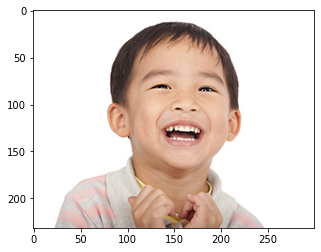

In [45]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [46]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [47]:
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [48]:
gray.shape

(232, 300)

In [50]:
faces= faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi= roi_color[ey:ey+eh, ex:ex+ew]
        

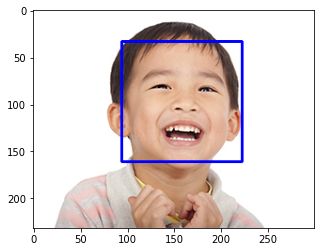

In [51]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

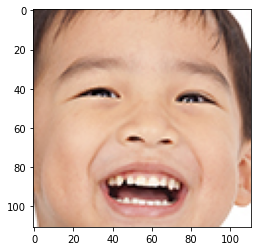

In [52]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [53]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image, axis=0)

In [54]:
predictions= new_model.predict(final_image)

In [55]:
predictions[0]

array([2.1009386e-05, 1.1144175e-07, 7.2229336e-06, 9.9944121e-01,
       4.9736851e-04, 1.5130227e-05, 1.7901501e-05], dtype=float32)

In [56]:
np.argmax(predictions) # This is the output belongs to class

3

Live Video Demo Face Emotion

In [66]:
import cv2

path="haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr = (255, 255, 255)

#Make a block image
img=np.zeros((500,500))

#set some text
text="Some text in a box!"

#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coords of the box with a small padding of two pixels
box_coords=((text_offset_x,text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap= cv2.VideoCapture(1)
# check if the web cam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in facess:
                face_roi= roi_color[ey:ey+eh, ex:ex+ew]
                
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image, axis=0)
#     final_image=final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_already_model.predict(final_image)
    
    font_scale=1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(predictions)==0):
        status= "Angry"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
    elif(np.argmax(predictions)==1):
        status= "Disgust"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
                    
    elif(np.argmax(predictions)==2):
        status= "Fear"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
    elif(np.argmax(predictions)==3):
        status= "Happy"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
    elif(np.argmax(predictions)==4):
        status= "Neutral"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
        
    elif(np.argmax(predictions)==5):
        status= "Sad"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
    elif(np.argmax(predictions)==6):
        status= "Surprised"
        
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1),(x1+w1, y1+h1),(0,0,0), -1)
        
        #add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
                    
        cv2.putText(frame, status, (100, 150), font, 3,(0,0,255),2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h),(0,0,255))
    
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break;
        
cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d